# Table of Contents:

This notebook covers notebook part of Emily's workflow:
*   EDA - Salt (- correlation)
*   EDA - Fiber (+ correlation)
*   Clustering (fiber-related features)

In [ ]:
#!pip install sqlalchemy
#!pip install pandasql

In [ ]:
# import packages
import json
import glob
import pandas as pd
# import pandasql as ps #SQL on Pandas Dataframe
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/545 Group Project/cleaned_data_v2.csv'
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91466 entries, 0 to 91465
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name          91466 non-null  object 
 1   ingredients_text      91466 non-null  object 
 2   serving_size          91466 non-null  object 
 3   additives_n           91466 non-null  float64
 4   additives             91461 non-null  object 
 5   additives_en          62159 non-null  object 
 6   nutrition_grade_fr    91466 non-null  object 
 7   energy_100g           91466 non-null  float64
 8   fat_100g              91466 non-null  float64
 9   saturated_fat_100g    91466 non-null  float64
 10  trans_fat_100g        91466 non-null  float64
 11  cholesterol_100g      91466 non-null  float64
 12  carbohydrates_100g    91466 non-null  float64
 13  sugars_100g           91466 non-null  float64
 14  fiber_100g            91466 non-null  float64
 15  proteins_100g      

In [ ]:
df.head()

,product_name,ingredients_text,serving_size,additives_n,additives,additives_en,nutrition_grade_fr,energy_100g,fat_100g,saturated_fat_100g,...,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,organic_label,nutrition_score_100g,nutrition_grade
0,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts ] [ wheat-flour ] [ flour ] [ sug...,NaN,b,1941.0,17.86,0.00,...,17.86,0.63500,0.250,0.000000,0.0,0.071,0.00129,0,0.0,4
1,Granola Cranberry And Acai,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,[ whole-rolled-oats ] [ rolled-oats ] [ oats...,NaN,c,1824.0,10.91,0.91,...,9.09,0.25400,0.100,0.000000,0.0,0.036,0.00262,0,6.0,3
2,"Peanuts, Mixed Nuts","Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,[ peanuts ] [ honey ] [ coating ] [ sucrose...,E415 - Xanthan gum,d,2389.0,42.86,7.14,...,25.00,0.54356,0.214,0.000000,0.0,0.071,0.00514,0,14.0,2
3,Cranberries,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,[ cranberries ] [ sugar ] [ sunflower-oil ] ...,NaN,c,1255.0,0.00,0.00,...,0.00,0.00000,0.000,0.000000,0.0,0.000,0.00000,0,8.0,3
4,Turkish Apricots,"Apricots, sulfur dioxide.",40 g (7 PIECES),1.0,[ apricots ] [ sulfur-dioxide ],E220 - Sulphur dioxide,c,1046.0,0.00,0.00,...,2.50,0.00000,0.000,0.001125,0.0,0.050,0.00360,0,8.0,3



--- additives_n ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         1.975018
std          2.160366
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: additives_n, dtype: float64


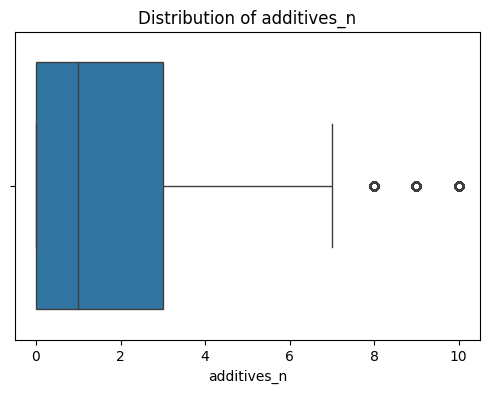


--- fat_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean        12.002236
std         13.292913
min          0.000000
25%          1.070000
50%          7.140000
75%         20.000000
max         57.140000
Name: fat_100g, dtype: float64


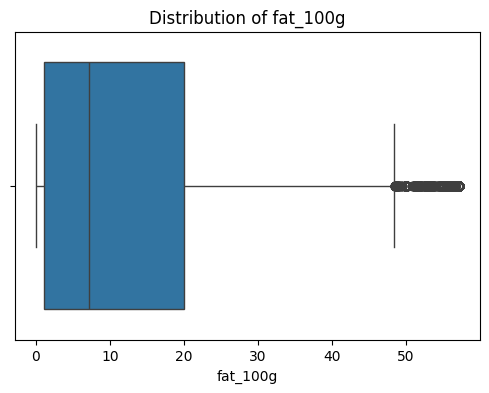


--- saturated_fat_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         3.831783
std          4.997969
min          0.000000
25%          0.000000
50%          1.750000
75%          6.250000
max         22.860000
Name: saturated_fat_100g, dtype: float64


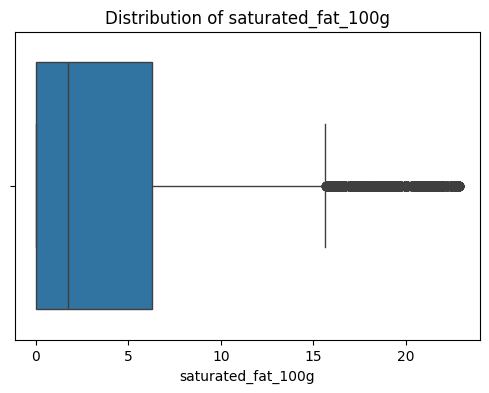


--- trans_fat_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         0.007423
std          0.081842
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.590000
Name: trans_fat_100g, dtype: float64


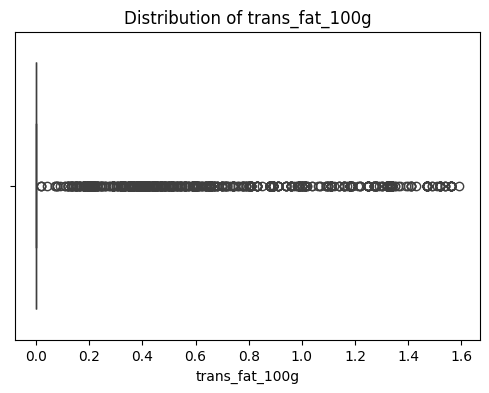


--- cholesterol_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         0.013446
std          0.023832
min          0.000000
25%          0.000000
50%          0.000000
75%          0.017000
max          0.119000
Name: cholesterol_100g, dtype: float64


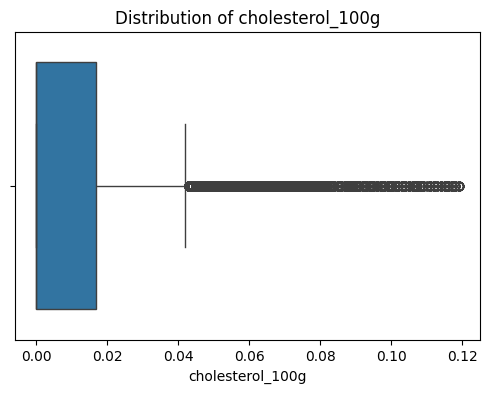


--- carbohydrates_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean        35.842166
std         26.944888
min          0.000000
25%         10.710000
50%         29.170000
75%         60.610000
max        100.000000
Name: carbohydrates_100g, dtype: float64


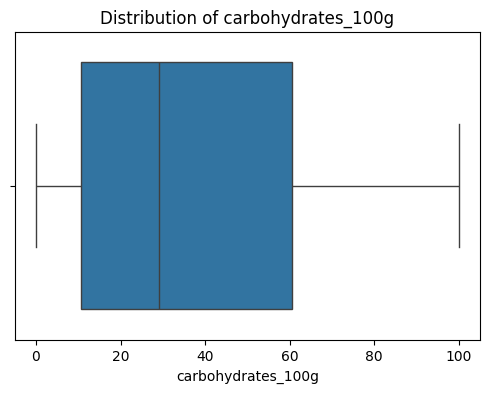


--- sugars_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean        14.704144
std         17.580254
min          0.000000
25%          1.890000
50%          6.250000
75%         23.530000
max         72.730000
Name: sugars_100g, dtype: float64


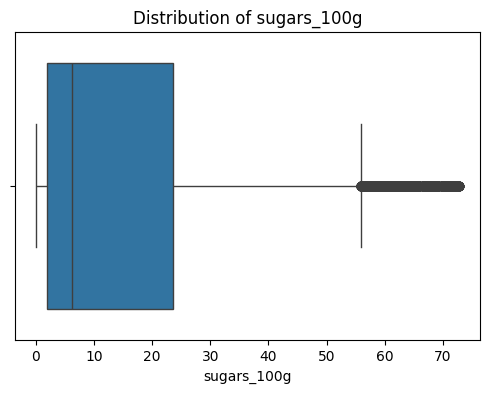


--- fiber_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         2.527946
std          3.043273
min          0.000000
25%          0.000000
50%          1.600000
75%          3.600000
max         15.300000
Name: fiber_100g, dtype: float64


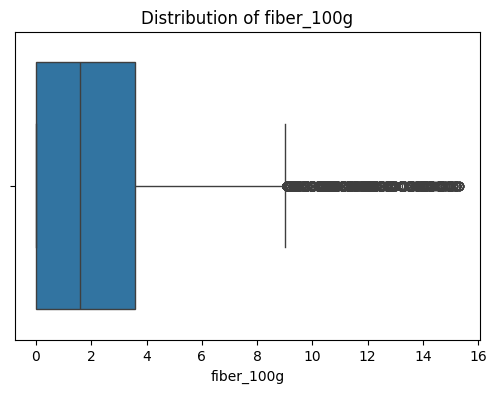


--- proteins_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         6.910677
std          6.287701
min          0.000000
25%          2.380000
50%          5.260000
75%         10.000000
max         31.250000
Name: proteins_100g, dtype: float64


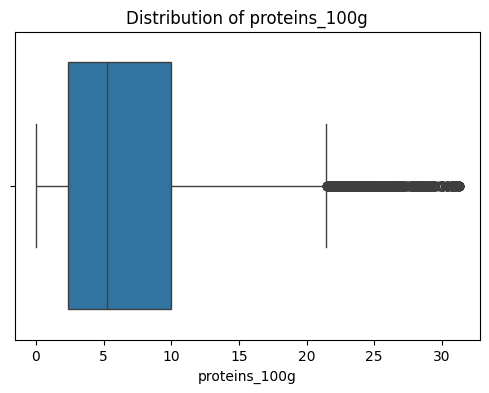


--- salt_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         0.897545
std          0.879944
min          0.000000
25%          0.152400
50%          0.726440
75%          1.305560
max          4.572000
Name: salt_100g, dtype: float64


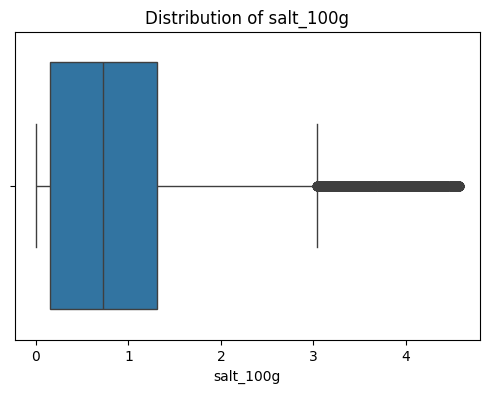


--- sodium_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         0.353364
std          0.346435
min          0.000000
25%          0.060000
50%          0.286000
75%          0.514000
max          1.800000
Name: sodium_100g, dtype: float64


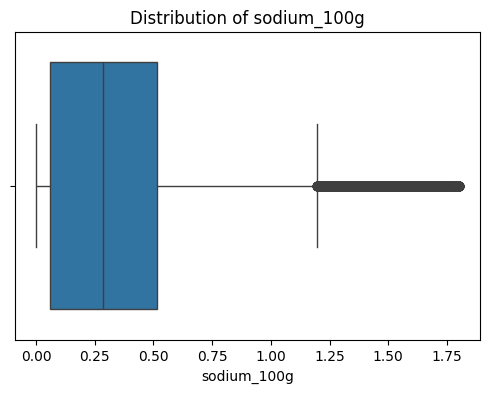


--- vitamin_a_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         0.000073
std          0.000164
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000088
max          0.001483
Name: vitamin_a_100g, dtype: float64


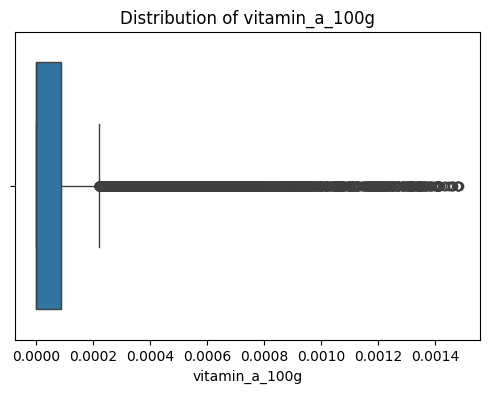


--- vitamin_c_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         0.003625
std          0.009522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.002100
max          0.086400
Name: vitamin_c_100g, dtype: float64


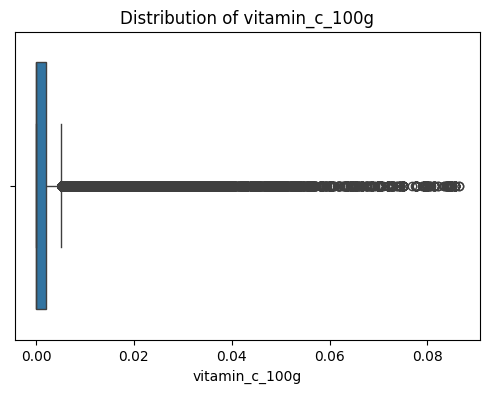


--- calcium_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         0.059957
std          0.085949
min          0.000000
25%          0.000000
50%          0.031000
75%          0.088000
max          0.588000
Name: calcium_100g, dtype: float64


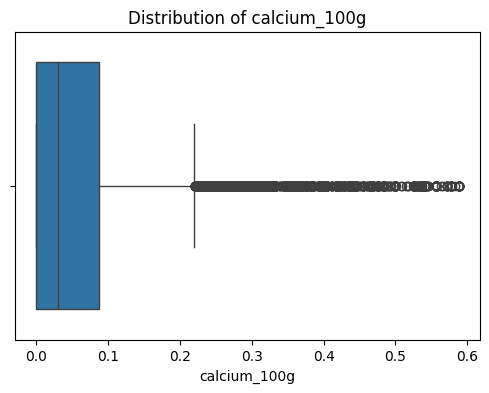


--- iron_100g ---
Missing Values: 0
Summary Statistics:
count    91466.000000
mean         0.001463
std          0.001693
min          0.000000
25%          0.000000
50%          0.001060
75%          0.002320
max          0.014520
Name: iron_100g, dtype: float64


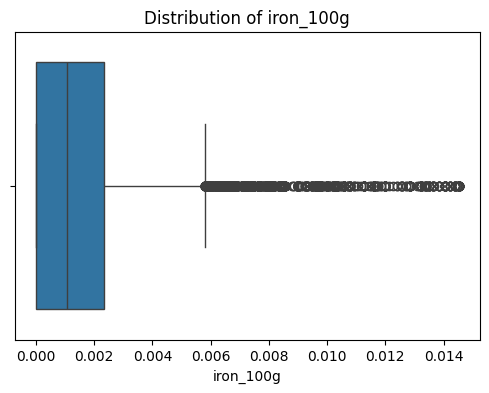


Summary Table for All Ingredients:
        additives_n      fat_100g  saturated_fat_100g  trans_fat_100g  \
count  91466.000000  91466.000000        91466.000000    91466.000000   
mean       1.975018     12.002236            3.831783        0.007423   
std        2.160366     13.292913            4.997969        0.081842   
min        0.000000      0.000000            0.000000        0.000000   
25%        0.000000      1.070000            0.000000        0.000000   
50%        1.000000      7.140000            1.750000        0.000000   
75%        3.000000     20.000000            6.250000        0.000000   
max       10.000000     57.140000           22.860000        1.590000   

       cholesterol_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count      91466.000000        91466.000000  91466.000000  91466.000000   
mean           0.013446           35.842166     14.704144      2.527946   
std            0.023832           26.944888     17.580254      3.043273   
min   

In [ ]:
# Define the list of all key columns (ingredients, nutrients, etc.) to analyze
all_ingredient_columns = [
    'additives_n', 'fat_100g', 'saturated_fat_100g', 'trans_fat_100g',
    'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
    'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin_a_100g',
    'vitamin_c_100g', 'calcium_100g', 'iron_100g'
]

# Filter the DataFrame to drop rows where all selected columns are null
filtered_df = df.dropna(subset=all_ingredient_columns, how='all')

# Initialize an empty dictionary to store the summaries for each ingredient
ingredient_summaries = {}

# Loop through each ingredient in the list and generate a report
for ingredient in all_ingredient_columns:
    print(f"\n--- {ingredient} ---")

    # Count missing values for the current ingredient
    missing_count = filtered_df[ingredient].isnull().sum()
    print(f"Missing Values: {missing_count}")

    # Drop rows with null values for the current ingredient to clean data for analysis
    ingredient_data = filtered_df[ingredient].dropna()

    # Generate and display summary statistics
    summary_stats = ingredient_data.describe()
    print("Summary Statistics:")
    print(summary_stats)

    # Store summary statistics in a dictionary for later reference
    ingredient_summaries[ingredient] = summary_stats

    # Plot boxplot to visualize the distribution of the ingredient
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=ingredient_data)
    plt.title(f"Distribution of {ingredient}")
    plt.xlabel(ingredient)
    plt.show()

# Optional: Combine all individual summaries into a single DataFrame
summary_df = pd.DataFrame(ingredient_summaries)
print("\nSummary Table for All Ingredients:")
print(summary_df)

**Observations from Data Summary:**

Data Completeness:
* Columns such as additives, fat-related metrics (fat, saturated fat), sugars, carbohydrates, fiber, and proteins have more substantial data compared to other nutrients, making them suitable candidates for further exploration.
* Nutrients like trans fat and certain vitamins and minerals (e.g., vitamin A, vitamin C, calcium, iron) have relatively low values or sparse data, which might limit their analytical value.

Relevant Nutrient Characteristics:
* Fiber: Known for its health benefits, such as improved digestion and potential to lower cholesterol, fiber content in organic versus non-organic foods could reveal health-focused differences.
* Protein: Protein is essential for muscle growth and overall nutrition, making it an appealing metric for consumers focused on health and fitness.
* Salt: Given the health risks associated with high salt intake, such as hypertension, examining salt content across organic and non-organic foods could be relevant. Organic products might have lower salt levels to cater to health-conscious consumers.

Potential Nutrient Choices for Exploration:
* Based on the data summary, we will explore salt next.
* Excessive salt intake is linked to health concerns, and some consumers look for lower-salt options. Organic products might have lower sodium content as part of their appeal to health-conscious consumers.

# EDA (Part 1) - Salt_100g

In [ ]:
# Filter out rows with missing values in 'salt_100g' and 'organic_label'
salt_df = df.dropna(subset=['salt_100g', 'organic_label'])

In [ ]:
# Initial descriptive analysis of salt content:

# Summary Statistics: Calculate summary statistics (mean, median, standard deviation) for salt_100g in organic and non-organic products. This step helps understand the central tendency and variability of salt content.

# Separate organic and non-organic salt data
organic_salt = salt_df[salt_df['organic_label'] == 1]['salt_100g']
non_organic_salt = salt_df[salt_df['organic_label'] == 0]['salt_100g']

# Summary statistics
print("Summary Statistics for Salt Content:")
print("Organic Products:\n", organic_salt.describe())
print("\nNon-Organic Products:\n", non_organic_salt.describe())

# Observation from summary:
# From the summary statistics, we observe that the average salt content in non-organic products is higher than in organic products. The median (50th percentile) salt content is also higher in non-organic products compared to organic products, suggesting that non-organic products generally have more salt on average.

Summary Statistics for Salt Content:
Organic Products:
 count    11430.000000
mean         0.639833
std          0.723759
min          0.000000
25%          0.050800
50%          0.447040
75%          0.972185
max          4.572000
Name: salt_100g, dtype: float64

Non-Organic Products:
 count    80036.000000
mean         0.934349
std          0.894002
min          0.000000
25%          0.170180
50%          0.764540
75%          1.359535
max          4.572000
Name: salt_100g, dtype: float64


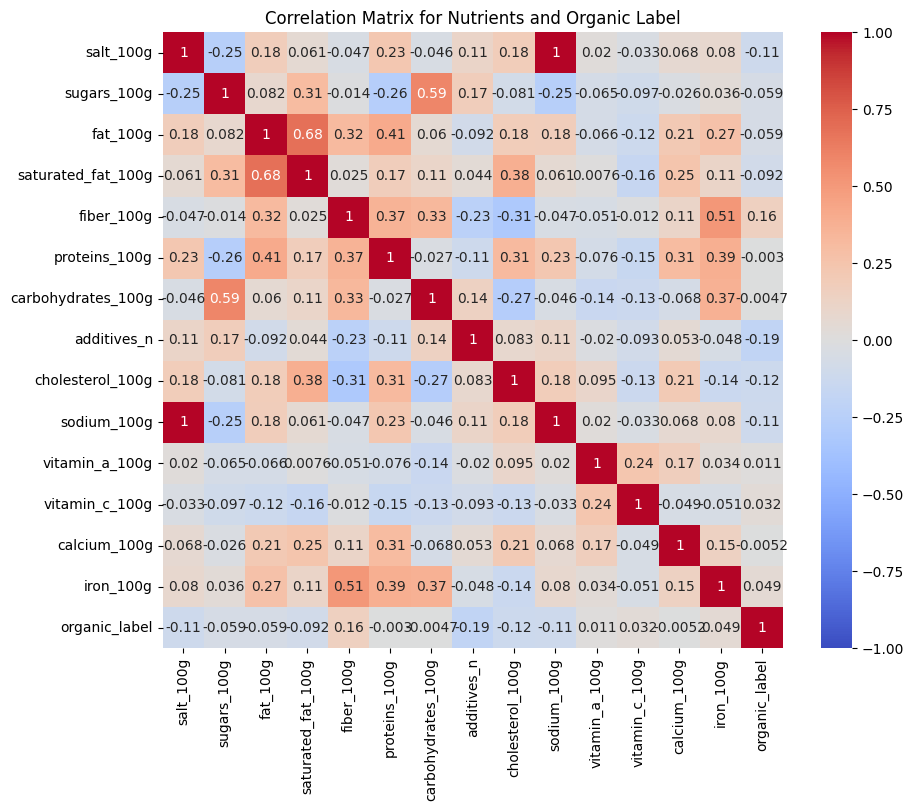

In [ ]:
# Select nutrient columns and organic label for correlation matrix
nutrient_cols = ['salt_100g', 'sugars_100g', 'fat_100g', 'saturated_fat_100g',
                 'fiber_100g', 'proteins_100g', 'carbohydrates_100g',  'additives_n', 'cholesterol_100g', 'sodium_100g', 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g', 'iron_100g', 'organic_label']
nutrient_df = salt_df[nutrient_cols]

# Calculate correlation matrix
corr_matrix = nutrient_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Nutrients and Organic Label")
plt.show()

# Observation:
# The correlation matrix indicates a low negative correlation between salt content and the organic label (-0.11). This suggests that organic products are weakly associated with salt levels, but the relationship is not strong enough to be a definitive predictor.

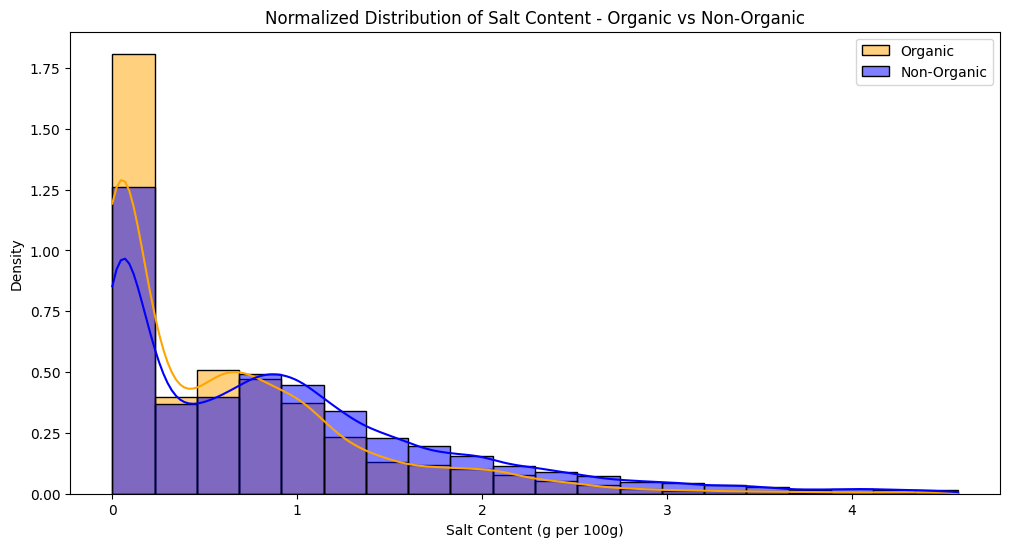

In [ ]:
# Plot normalized density histograms for salt content in organic and non-organic products. Rational for density vs frequency is due to the inbalanced number of data in organic vs. non-organic (more data), thus chose relative distribution shapes directly and fairly, without losing data.
plt.figure(figsize=(12, 6))
sns.histplot(organic_salt, color='orange', kde=True, label='Organic', bins=20, stat="density")
sns.histplot(non_organic_salt, color='blue', kde=True, label='Non-Organic', bins=20, stat="density")
plt.xlabel('Salt Content (g per 100g)')
plt.ylabel('Density')
plt.title('Normalized Distribution of Salt Content - Organic vs Non-Organic')
plt.legend()
plt.show()

# Observations:
# The normalized distribution plot of salt content shows that a significant proportion of both organic and non-organic products have very low salt content. Non-organic products have a wider distribution with a slightly longer tail, indicating a broader range of salt content levels. This suggests that some non-organic products are relatively high in salt compared to organic products.

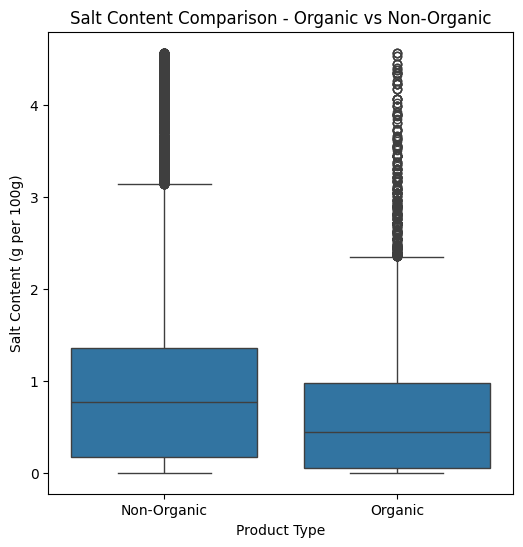

In [ ]:
# Boxplot comparison of salt content
plt.figure(figsize=(6, 6))
sns.boxplot(data=salt_df, x='organic_label', y='salt_100g')
plt.xticks([0, 1], ['Non-Organic', 'Organic'])
plt.xlabel('Product Type')
plt.ylabel('Salt Content (g per 100g)')
plt.title('Salt Content Comparison - Organic vs Non-Organic')
plt.show()

# Observation:
# The box plot shows that both distributions have outliers with high salt content, though non-organic products show a greater number of these outliers. The interquartile range (IQR) is larger for non-organic products, which aligns with the higher variability observed in the summary statistics.

**EDA - Salt Conclusion:**

These EDA results suggest that, while organic products tend to have lower salt content on average, there is considerable overlap between the distributions of organic and non-organic products. This could mean that while there is a slight trend toward lower salt in organic products, it may not be a strong enough distinguishing factor on its own for predictive purposes.

Further analysis could involve:

Exploring other features (like additives or processing level) to see if they interact with salt content differently between organic and non-organic products.
Combining salt with other nutrients in composite metrics, as single nutrient differences (like salt) may not capture the full nutritional picture.

# EDA (Part 2) - Fiber_100g

In [ ]:
# Prepare the data for fiber content
# Drop rows with missing values in 'fiber_100g' and 'organic_label'
fiber_df = df.dropna(subset=['fiber_100g', 'organic_label'])

# Separate the data for organic and non-organic fiber content
organic_fiber = fiber_df[fiber_df['organic_label'] == 1]['fiber_100g']
non_organic_fiber = fiber_df[fiber_df['organic_label'] == 0]['fiber_100g']

In [ ]:
# Display summary statistics for fiber content in organic and non-organic products
print("Summary Statistics for Fiber Content:")
print("Organic Products:\n", organic_fiber.describe())
print("\nNon-Organic Products:\n", non_organic_fiber.describe())

# Observations:
# The average fiber content in organic products is notably higher than in non-organic products. This suggests that organic products tend to contain more fiber on average. The median fiber content also reflects this difference.

Summary Statistics for Fiber Content:
Organic Products:
 count    11430.000000
mean         3.777279
std          3.614849
min          0.000000
25%          0.800000
50%          2.900000
75%          6.500000
max         15.300000
Name: fiber_100g, dtype: float64

Non-Organic Products:
 count    80036.000000
mean         2.349528
std          2.909200
min          0.000000
25%          0.000000
50%          1.500000
75%          3.600000
max         15.300000
Name: fiber_100g, dtype: float64


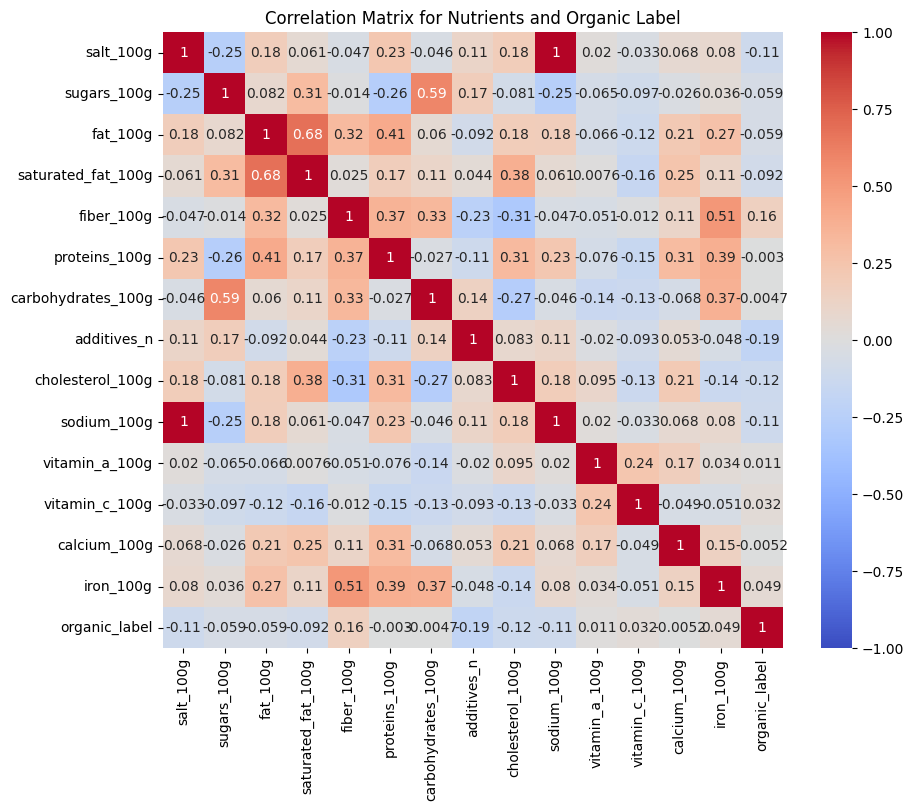

In [ ]:
# Select nutrient columns and organic label for correlation matrix
nutrient_cols = ['salt_100g', 'sugars_100g', 'fat_100g', 'saturated_fat_100g',
                 'fiber_100g', 'proteins_100g', 'carbohydrates_100g',  'additives_n', 'cholesterol_100g', 'sodium_100g', 'vitamin_a_100g', 'vitamin_c_100g', 'calcium_100g', 'iron_100g', 'organic_label']
nutrient_df = fiber_df[nutrient_cols]

# Calculate correlation matrix
corr_matrix = nutrient_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Nutrients and Organic Label")
plt.show()

# Observation:
# The correlation matrix shows a moderate positive correlation (+0.16)between fiber content and the organic label. This correlation is higher than the correlation between salt content and the organic label, suggesting that fiber may be a slightly better predictor for organic status.

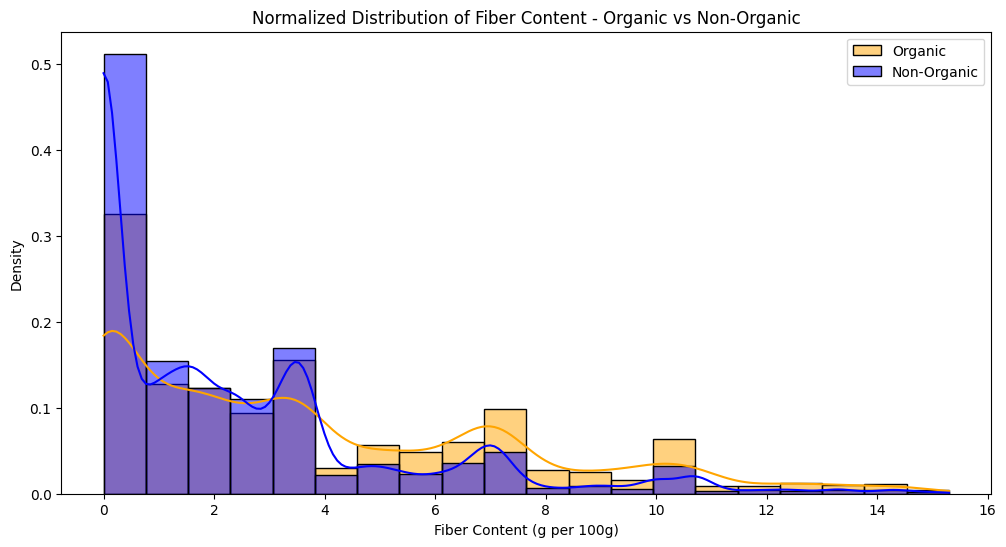

In [ ]:
# # Plot normalized density histograms for fiber in organic and non-organic products
plt.figure(figsize=(12, 6))
sns.histplot(organic_fiber, color='orange', kde=True, label='Organic', bins=20,stat="density")
sns.histplot(non_organic_fiber, color='blue', kde=True, label='Non-Organic', bins=20,stat="density")
plt.xlabel('Fiber Content (g per 100g)')
plt.ylabel('Density')
plt.title('Normalized Distribution of Fiber Content - Organic vs Non-Organic')
plt.legend()
plt.show()

# Observations:
# The normalized distribution plot shows a high concentration of both organic and non-organic products with low fiber content. However, organic products generally show a longer tail in the distribution, indicating a higher prevalence of products with higher fiber content. In the distribution tails, organic products appear to have more instances of higher fiber content, suggesting that organic foods may offer fiber-rich options more frequently than non-organic ones.

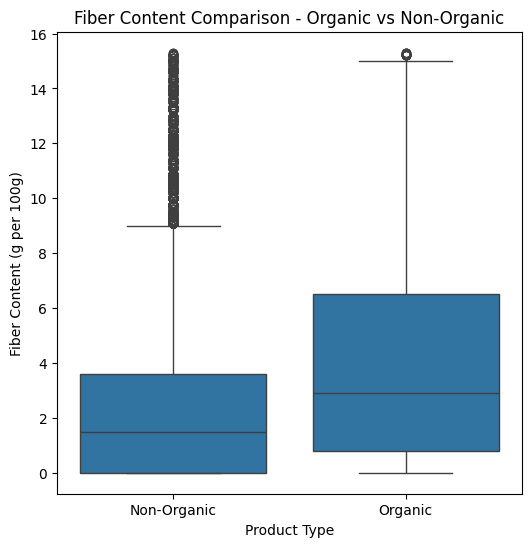

In [ ]:
# Boxplot comparison of fiber content
plt.figure(figsize=(6, 6))
sns.boxplot(data=fiber_df, x='organic_label', y='fiber_100g')
plt.xticks([0, 1], ['Non-Organic', 'Organic'])
plt.xlabel('Product Type')
plt.ylabel('Fiber Content (g per 100g)')
plt.title('Fiber Content Comparison - Organic vs Non-Organic')
plt.show()

# Observation:
# The box plot reveals that organic products not only have a higher median but also a greater spread in fiber content, as shown by the larger interquartile range (IQR). This variability suggests that while organic products can contain higher fiber content, they also exhibit more diversity in fiber levels. Both organic and non-organic products have some high outliers in fiber content, but organic products show a wider range in the upper values, reinforcing the presence of high-fiber organic options.

**EDA - Fiber Conclusion:**

These findings suggest that organic products tend to have higher fiber content on average, with a greater variety in fiber levels. The moderately positive correlation, combined with the distinct distribution pattern, indicates that fiber could be a useful feature in distinguishing organic from non-organic products, although it is still a moderate predictor.

Next Steps: Given the stronger relationship between fiber content and organic status, compared to salt, we can explore fiber content further to get ready for predictive modeling later.

# Clustering - Fiber and related features

In [ ]:
# Step 1: Data cleaning and preprocessing

# 1.1 Drop Irrelevant Columns
fiber_df = fiber_df.drop(columns=['product_name', 'ingredients_text', 'nutrition_grade_fr'])

# 1.2 Select Key Features
# Focusing on fiber and additional nutritional columns
selected_features = ['fiber_100g', 'sugars_100g', 'carbohydrates_100g', 'proteins_100g', 'additives_n', 'salt_100g']
data = fiber_df[selected_features]

# 1.3 Additives
# Create 'additive_count' by counting the number of additives in 'additives_en'
fiber_df['additive_count'] = fiber_df['additives_en'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Verify by checking the new column
# print(fiber_df[['additives_en', 'additives_n', 'additive_count']].head(10))

In [ ]:
# Step 2: Feature engineering
# 2.1 Create Ratios and Composite Features
# Fiber-to-Sugar Ratio
fiber_df['fiber_to_sugar_ratio'] = fiber_df['fiber_100g'] / (fiber_df['sugars_100g'] + 1e-6)  # Avoid division by zero

# Fiber-to-Carbohydrate Ratio
fiber_df['fiber_to_carb_ratio'] = fiber_df['fiber_100g'] / (fiber_df['carbohydrates_100g'] + 1e-6)

# Fiber Density (fiber as a percentage of energy if energy is available)
if 'energy_100g' in fiber_df.columns:
    fiber_df['fiber_density'] = fiber_df['fiber_100g'] / (fiber_df['energy_100g'] + 1e-6)

# Add these new features to the clustering data
data = fiber_df[['fiber_100g', 'sugars_100g', 'carbohydrates_100g', 'proteins_100g', 'additive_count', 'salt_100g',
                 'fiber_to_sugar_ratio', 'fiber_to_carb_ratio', 'fiber_density']]
data = data.fillna(0)  # Fill any remaining NaN values generated in the new features

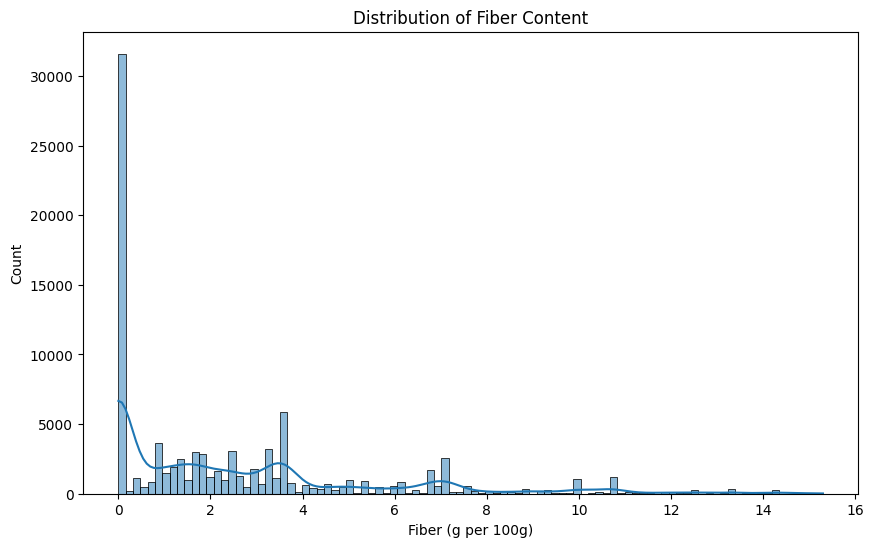

In [ ]:
# Step 3: EDA on Fiber and Related Features
# 3.1 Distribution Analysis: Plotting distributions of fiber and related features
plt.figure(figsize=(10, 6))
sns.histplot(fiber_df['fiber_100g'], kde=True)
plt.title("Distribution of Fiber Content")
plt.xlabel("Fiber (g per 100g)")
plt.show()

# Observation:
# The distribution of fiber content is highly skewed to the right, with a large concentration of products having very low fiber content (close to 0g per 100g). This suggests that a majority of products in the dataset are low in fiber. There are some products with higher fiber content, but these are relatively sparse. The long tail in the distribution indicates the presence of high-fiber products, though they are in the minority.

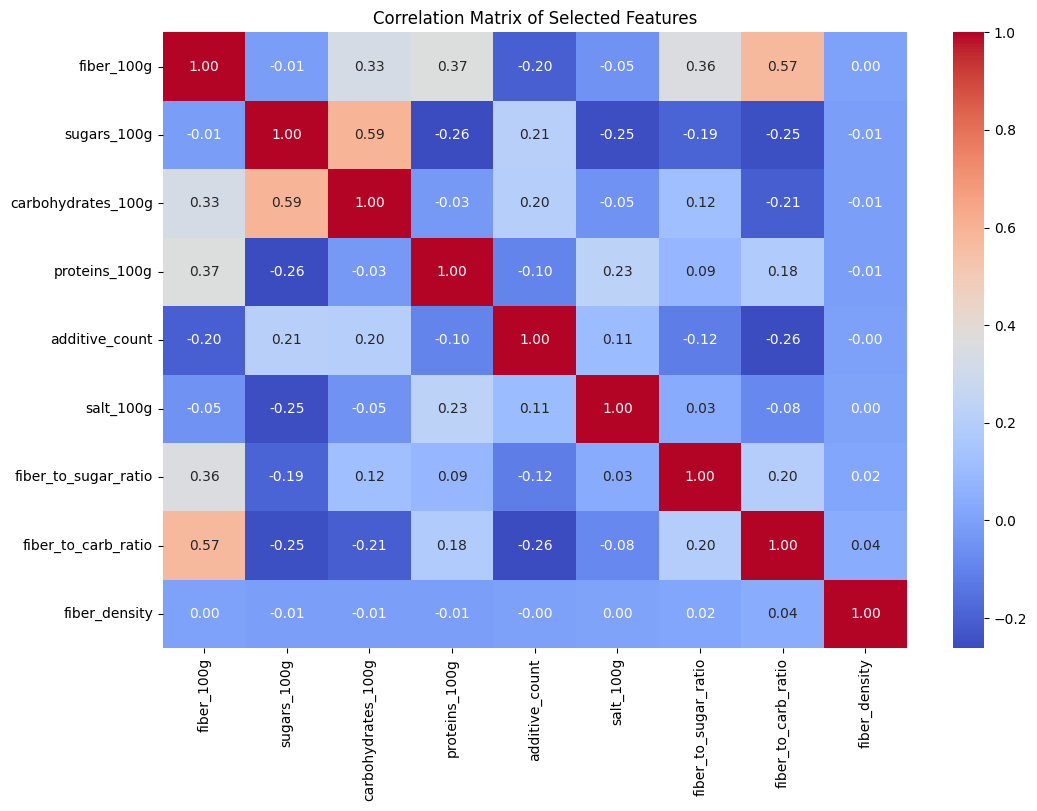

In [ ]:
# 3.2 Correlation Analysis
# Compute the correlation matrix for selected features
corr_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

# Observation:
# The correlation between fiber_100g and fiber_to_carb_ratio is quite strong (+0.57), which makes sense as products high in fiber relative to carbohydrates will have a higher fiber-to-carb ratio. Including both might be somewhat redundant, so we may consider using only one in clustering to reduce dimensionality.

# fiber_to_sugar_ratio has a moderate correlation with fiber_100g (+0.36), suggesting it could be a complementary feature that captures different aspects of fiber-rich products without being entirely redundant.

# fiber_100g has a moderate positive correlation with carbohydrates_100g (+0.33)and proteins_100g (+0.37), indicating that high-fiber foods may also tend to be higher in carbohydrates and proteins, which could represent more whole or complex food items. There’s a very low correlation between fiber_100g and salt_100g (-0.05), meaning that salt content does not co-vary strongly with fiber content. This suggests that salt may not be a critical factor for clustering around fiber.

# Given above, we will use the following feature set for clustering:
# fiber_100g: Represents fiber content directly.
# additive_count: Reflects the degree of processing, as products with more additives tend to be more processed.
# fiber_to_sugar_ratio: Provides a view of fiber relative to sugar, useful for identifying health-oriented products.

In [ ]:
# Step 4: Standardize selected features
from sklearn.preprocessing import StandardScaler

# Select the refined features
features_for_clustering = fiber_df[['fiber_100g', 'additive_count', 'fiber_to_sugar_ratio']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_clustering)

In [ ]:
# Step 5: Determine Optimal Number of Clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range of cluster numbers to test
K_range = range(2, 6)

# Store inertia and silhouette scores for each k
inertia = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

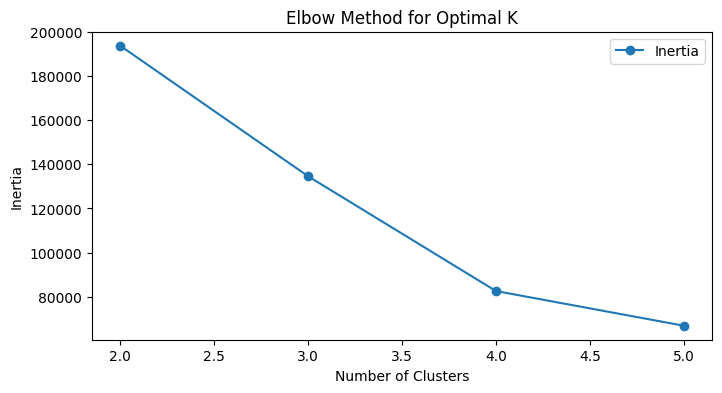

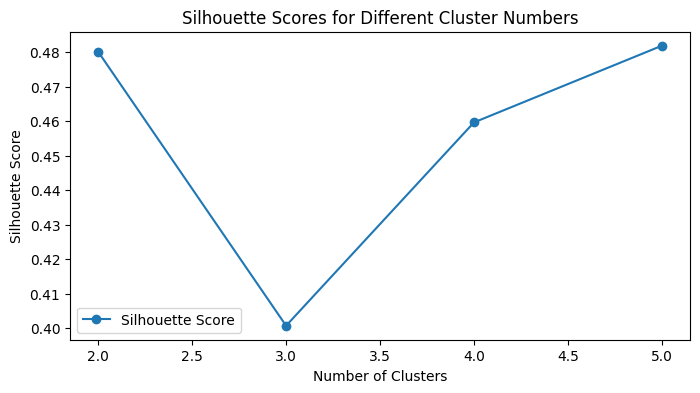

In [ ]:
# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'o-', label='Inertia')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.legend()
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, 'o-', label='Silhouette Score')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different Cluster Numbers")
plt.legend()
plt.show()


# Choose optimal K:
# 3 clusters is the best choice because: It strikes a balance between inertia reduction (elbow point) and cluster differentiation. Using more than 3 clusters would add complexity without significant gains in insight. Silhouette scores for 2 clusters are high but oversimplify the grouping, potentially missing meaningful fiber-related distinctions.

In [ ]:
# Step 6: Apply K-Means with optimal cluster number
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
fiber_df['cluster'] = clusters

In [ ]:
# Step 7: Interpret the clusters
# Profile each cluster by calculating the mean values of selected features
cluster_summary = fiber_df.groupby('cluster')[['fiber_100g', 'additive_count', 'fiber_to_sugar_ratio']].mean()
print("Cluster Profiles:\n", cluster_summary)

# Proportion of organic products within each cluster
organic_distribution = fiber_df.groupby('cluster')['organic_label'].mean()
print("Proportion of Organic Products in Each Cluster:\n", organic_distribution)

# Observations:
# Cluster 0: This cluster likely represents highly processed, low-quality products with more additives and fewer organic options.
# Cluster 1: This cluster represents moderately processed products, with better dietary quality and a balanced profile of organic and non-organic items.
# Cluster 2: This cluster likely represents high-quality, high-fiber products with minimal processing and a higher fiber-to-sugar ratio.

Cluster Profiles:
          fiber_100g  additive_count  fiber_to_sugar_ratio
cluster                                                  
0          1.095404        2.975899          6.609292e+04
1          6.348415        0.933355          3.481753e+05
2          8.847830        0.911235          8.847830e+06
Proportion of Organic Products in Each Cluster:
 cluster
0    0.092338
1    0.217468
2    0.218268
Name: organic_label, dtype: float64


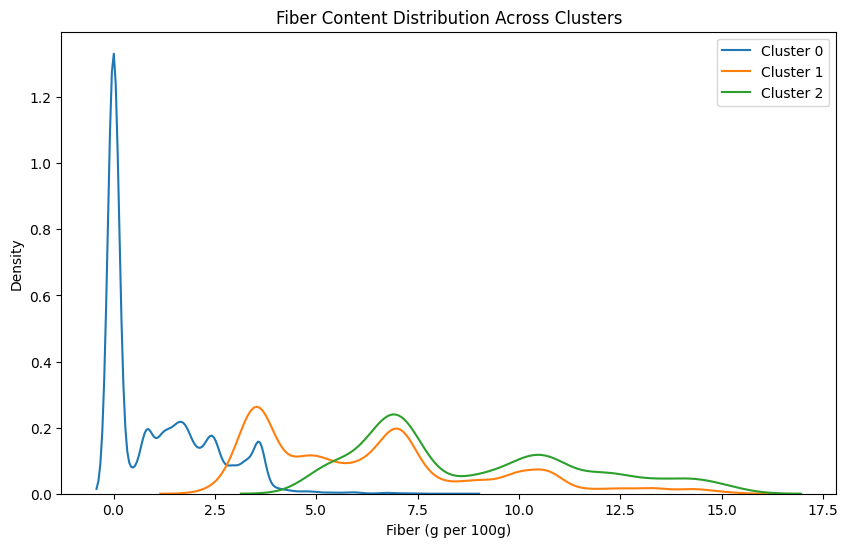

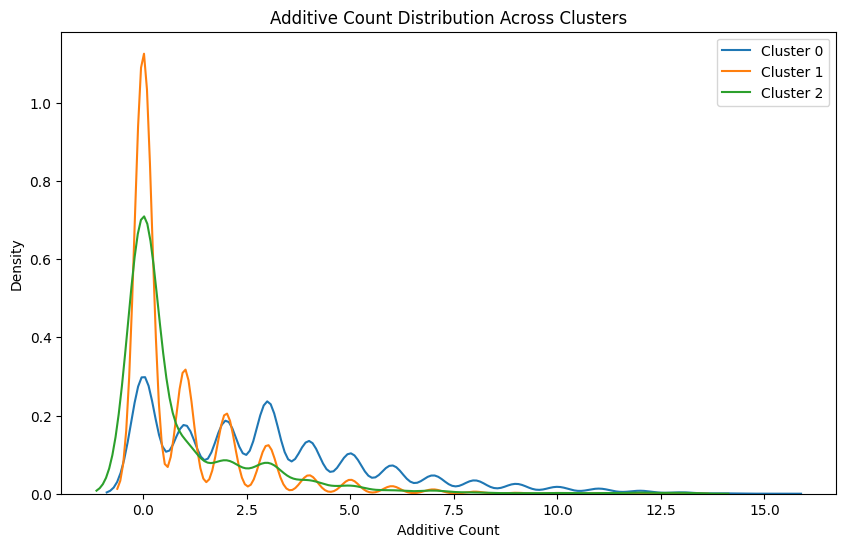

In [ ]:
# Step 8: Visualize cluster distributions
# Distribution of Fiber Content in Each Cluster
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_k):
    sns.kdeplot(fiber_df[fiber_df['cluster'] == cluster_id]['fiber_100g'], label=f'Cluster {cluster_id}')
plt.xlabel("Fiber (g per 100g)")
plt.title("Fiber Content Distribution Across Clusters")
plt.legend()
plt.show()

# Distribution of Additive Count in Each Cluster
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_k):
    sns.kdeplot(fiber_df[fiber_df['cluster'] == cluster_id]['additive_count'], label=f'Cluster {cluster_id}')
plt.xlabel("Additive Count")
plt.title("Additive Count Distribution Across Clusters")
plt.legend()
plt.show()

# Observation:
# Fiber content distribution: Cluster 0 distribution is tightly concentrated near the lower fiber range, confirming the profile of highly processed, low-fiber products. Cluster 1 has a broader distribution vs Cluster 0, which aligns with moderately processed products with a balanced fiber profile. Cluster 2 represents high-fiber products, aligning with its earlier profile as the healthiest group.

# Additive count distribution: Cluster 0 products are heavily processed with the most additives. Cluster 1 products are less processed vs Cluster 0. Cluster 2 most products have very low additive counts.

**Conclusion from Clustering:**

Cluster 0: Represents highly processed, low-fiber, high-additive products.

Cluster 1: Moderately processed products with balanced fiber and low additives.

Cluster 2: High-quality, minimally processed products with high fiber and very low additives.

The clustering supports the hypothesis that organic products often have higher fiber content, fewer additives, and are more likely to be minimally processed. This suggests that organic foods tend to align with healthier nutritional profiles, though the clusters show that not all organic products are high in fiber or low in additives.

Next step: Given the clustering results, suggest we next compare with other teammates' clustering results to decide on the final feature set going into the models. Perhaps, we would consider about expanding our feature set to include non-fiber related nutrient values to improve on the accuracy of predicting organic labeling.